In [1]:
import tensorflow as tf 
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [5]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/ricks/Bureaublad/Velotech/velotech2_aai/Notebooks/CNN/dataset_onoff_cropped')

Found 405 files belonging to 2 classes.


In [38]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [6]:
data_itarator = data.as_numpy_iterator()

In [7]:
#Batch 
batch = data_itarator.next()

In [8]:
#Images als array
# 1 = aan
# 0  = uit
batch[0].shape

(32, 256, 256, 3)

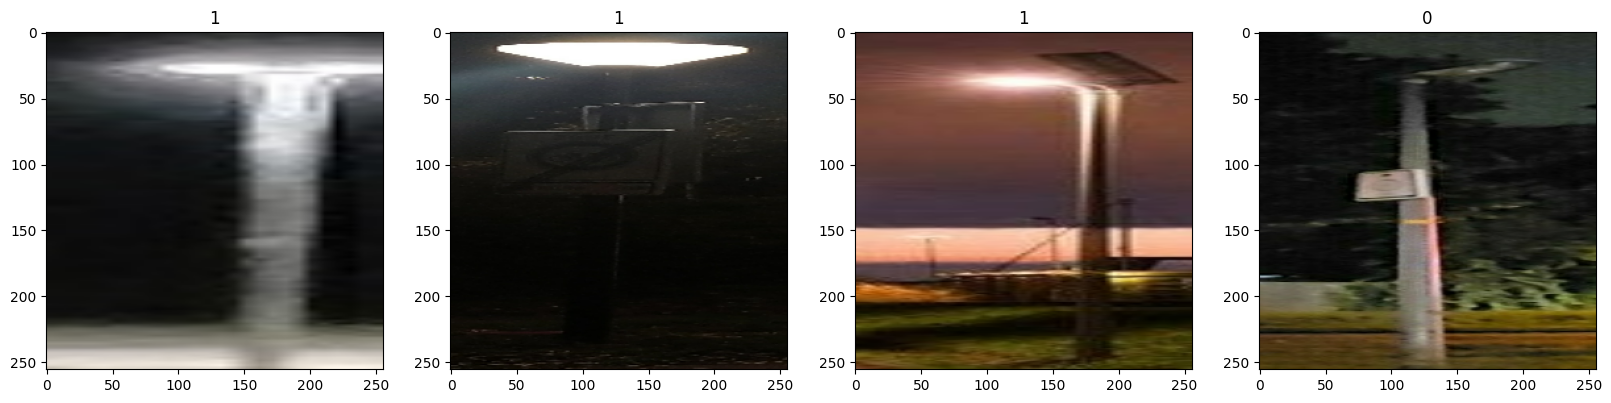

In [9]:
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing data

In [10]:
#Images tussen 0 en 1 zetten, helpt het CNN te optimaliseren door met kleine getallen te werken, 255 is de max in de batch.
scaled = batch[0] / 255

In [11]:
data = data.map(lambda x, y: (x/255, y))

In [12]:
scaled_itarator = data.as_numpy_iterator()

In [13]:
batch = scaled_itarator.next()

In [14]:
batch[0].min()

0.0

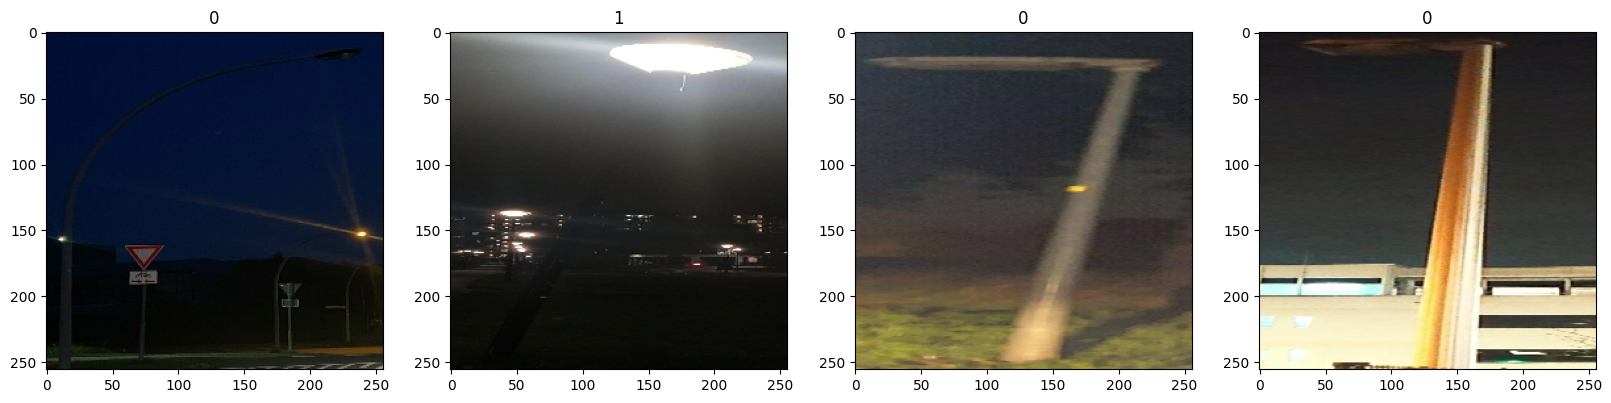

In [15]:
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [16]:
#Aantal batches van de data
len(data)

13

In [19]:
train_size = int(len(data)*.7) #Trainings size (tijdens training)
val_size = int(len(data)*.2) #Validation size (tijdens training)
test_size = int(len(data)*.1)+1 #Test size (na training)

In [20]:
#Ter controle, moet gelijk zijn aan de len(data)
train_size+val_size+test_size

13

In [21]:
#Opsplitsen van de dataset met take en skip
train = data.take(train_size) #Pakt data ten groote van de train_size
val = data.skip(train_size).take(val_size) #Skipt de trainingsdata en pakt de overige data ten grote van de validation size
test = data.skip(train_size+val_size).take(test_size) #Skipt train en val data en pakt de overige data ten grote van de test size

# CNN Bouwen

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
#Sequential model aanstellen
model = Sequential()

In [24]:
#Lagen toevoegen aan het model
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3))) #Input laag met 16 filters bij 3x3 pixels met een stride van 1 en relu activatie.
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #Output van 1, binair classificatie.



In [25]:
#Model compileren
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy']) #adam is een optimaliser
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [26]:
logdir = 'logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [28]:
hist = model.fit(train, epochs= 10, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/20


9/9 [==============================] - 7s 573ms/step - loss: 0.7448 - accuracy: 0.6528 - val_loss: 0.7746 - val_accuracy: 0.6875
Epoch 2/20
9/9 [==============================] - 5s 530ms/step - loss: 0.5909 - accuracy: 0.7465 - val_loss: 0.4569 - val_accuracy: 0.8438
Epoch 3/20
9/9 [==============================] - 5s 533ms/step - loss: 0.4322 - accuracy: 0.8194 - val_loss: 0.4244 - val_accuracy: 0.8281
Epoch 4/20
9/9 [==============================] - 5s 548ms/step - loss: 0.3428 - accuracy: 0.8299 - val_loss: 0.2676 - val_accuracy: 0.8438
Epoch 5/20
9/9 [==============================] - 5s 523ms/step - loss: 0.2555 - accuracy: 0.9028 - val_loss: 0.2257 - val_accuracy: 0.8750
Epoch 6/20
9/9 [==============================] - 5s 528ms/step - loss: 0.1940 - accuracy: 0.9028 - val_loss: 0.1754 - val_accuracy: 0.9219
Epoch 7/20
9/9 [==============================] - 5s 548ms/step - loss: 0.1892 - accuracy: 0.9201 - val_loss: 0.2647 - val_accuracy: 0.9219
Epoch 8/20
9/9 [===============

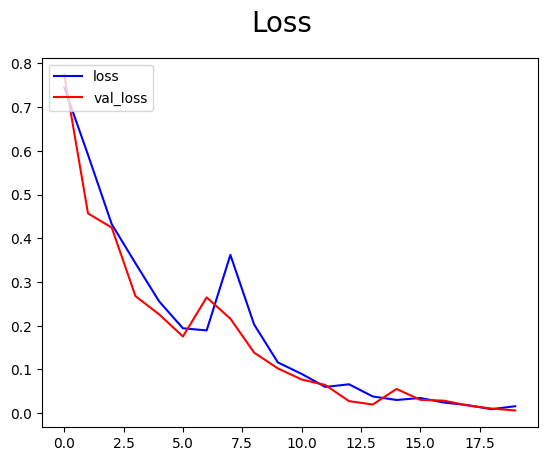

In [29]:
#Performace plotten

fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc= 'upper left')
plt.show()

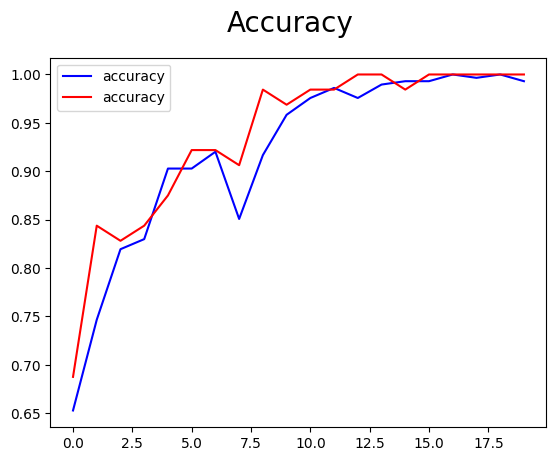

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'blue', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc= 'upper left')
plt.show()

# Performance evaluation

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [33]:
#Metrics updaten
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)


1/1 [==============================] - 0s 154ms/step


In [34]:
#Printen van de metrics
print('Precision:', precision.result().numpy(), 'Recall:', recall.result().numpy(), 'Accuracy:', accuracy.result().numpy())

Precision: 1.0 Recall: 1.0 Accuracy: 1.0


# Testen van het model

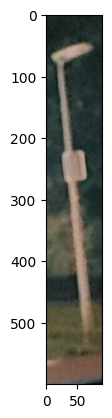

In [35]:
#Testen door een foto in te laden die het model nog nooit gezien heeft 
img = cv2.imread('113_cropped.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

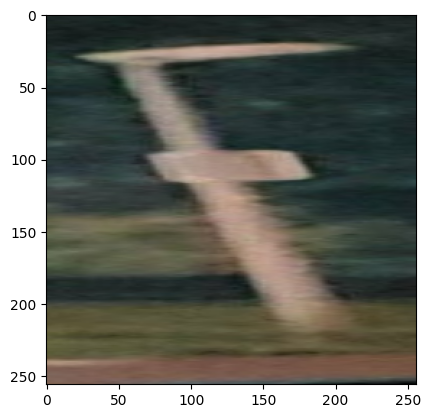

In [36]:
#image resizen voor het NN (256, 256)

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print('Array waarde vanuit model: ', yhat)

if yhat > 0.5:
    print('Voorspelde klasse door model is aan.')
else:
    print('Voorspelde klasse door model is uit.')

1/1 [==============================] - 0s 35ms/step
Array waarde vanuit model:  [[0.00212645]]
Voorspelde klasse door model is uit.


# Model opslaan

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#Model oplsaan
#model.save(os.path.join('models', 'light_onoff_model.h5'))

#Model inladen
#loaded_model = load_model(os.path.join('models', 'light_onoff_model.h5'))